# Importing Libraries and Data

In [1]:
# Data analysis Libraries
import pandas as pd 
import numpy as np 
# import math
# import glob
# import os

# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Filter Warnings during visualization
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
tokyo_medals_df = pd.read_excel('/content/drive/MyDrive/Datasets/Tokyo 2021 Data/Tokyo 2021 Medals.xlsx')
tokyo_medals_df.head()


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


# Exploratory Data Analysis

**Let us execute some fundamental data analysis code which is applicable for all numerical datasets.**



In [3]:
# Number of rows and columns in the dataset
tokyo_medals_df.shape

(93, 7)

In [4]:
# Column names
tokyo_medals_df.columns

Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')

In [5]:
# Detailed information about each dataset column
tokyo_medals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [6]:
# Display dataset statistics like minimum, maximum, standard deviation, 
# and mean value for every numerical column.
tokyo_medals_df.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [7]:
# Check missing values
tokyo_medals_df.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [9]:
# Check duplicate rows
tokyo_medals_df.duplicated().sum()

0

**After performing fundamental analysis, let us now explore the dataset in detail.**

**We will perform numerical as well as visual analysis on this dataset.**

In [12]:
# Sorting dataset rows in descending order on the basis of 
# total number of medals won by each country
tokyo_medals_sorted_df=tokyo_medals_df.sort_values("Total",ascending=False, ignore_index=True)
tokyo_medals_sorted_df.head(5)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
4,3,Japan,27,14,17,58,5


In [15]:
# Sometimes it is better to change the dataset index 
# from numerical values to a string column values. 
# In this dataset, we can use Team/NOC as a string index.
# We are not updating the current dataset here.
tokyo_medals_sorted_df[:10].set_index("Team/NOC")

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Team/NOC,,,,,,
United States of America,1,39,41,33,113,1
People's Republic of China,2,38,32,18,88,2
ROC,5,20,28,23,71,3
Great Britain,4,22,21,22,65,4
Japan,3,27,14,17,58,5
Australia,6,17,7,22,46,6
Italy,10,10,10,20,40,7
Germany,9,10,11,16,37,8
Netherlands,7,10,12,14,36,9


In [11]:
# Display the names of each country participating in Tokyo Olympics
print("Names of Participating Countries")
print(tokyo_medals_sorted_df['Team/NOC'].unique())
# Display the total number of countries
no_of_countries = len(tokyo_medals_sorted_df['Team/NOC'].unique())
print("Total Number of Countries: ", no_of_countries)

Names of Participating Countries
['United States of America' "People's Republic of China" 'ROC'
 'Great Britain' 'Japan' 'Australia' 'Italy' 'Germany' 'Netherlands'
 'France' 'Canada' 'Brazil' 'Hungary' 'Republic of Korea' 'New Zealand'
 'Ukraine' 'Spain' 'Cuba' 'Poland' 'Switzerland' 'Turkey' 'Chinese Taipei'
 'Czech Republic' 'Denmark' 'Kenya' 'Jamaica' 'Sweden' 'Serbia' 'Georgia'
 'Kazakhstan' 'Croatia' 'Norway' 'Austria' 'Belgium'
 'Islamic Republic of Iran' 'India' 'Azerbaijan' 'Belarus' 'Egypt'
 'Bulgaria' 'Hong Kong, China' 'Indonesia' 'Uzbekistan' 'Slovenia'
 'Dominican Republic' 'Colombia' 'Portugal' 'Ethiopia' 'Armenia'
 'Mongolia' 'Mexico' 'Venezuela' 'Philippines' 'Romania' 'Greece' 'Uganda'
 'Slovakia' 'Ireland' 'Israel' 'South Africa' 'Qatar' 'Argentina'
 'Ecuador' 'Kyrgyzstan' 'San Marino' 'Bahamas' 'Estonia' 'Finland'
 'Nigeria' 'Kosovo' 'Jordan' 'Malaysia' 'Fiji' 'Latvia' 'Thailand'
 'Tunisia' 'Kuwait' 'Grenada' 'Ghana' "Côte d'Ivoire" 'Burkina Faso'
 'Botswana' 'Repub

In [17]:
# Display the top 10 countries who have won most number of medals.
# We have already sorted our dataset above, so we only need to 
# index the first 10 rows.
total=tokyo_medals_sorted_df.loc[0:9]
total

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
4,3,Japan,27,14,17,58,5
5,6,Australia,17,7,22,46,6
6,10,Italy,10,10,20,40,7
7,9,Germany,10,11,16,37,8
8,7,Netherlands,10,12,14,36,9
9,8,France,10,12,11,33,10


In [18]:
# Extract the medal details for Japan
medals_japan = tokyo_medals_sorted_df.loc[tokyo_medals_sorted_df['Team/NOC']=='Japan']
medals_japan

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
4,3,Japan,27,14,17,58,5


**Now, we will visualize this dataset using matplot, plotly and seaborn libraries to understand it further.**

In [45]:
# Setting global font size for all visulizations
plt.rcParams['font.size'] = '16'

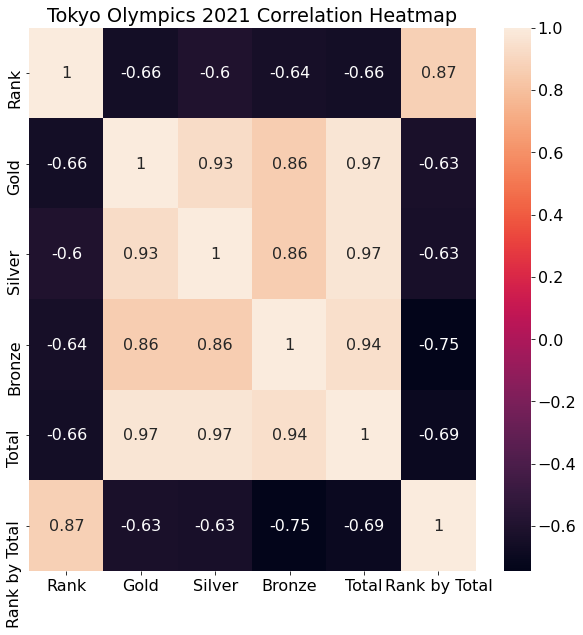

In [22]:
# Display correlation heatmap. This is an important plot since it 
# highlights the relationship of each dataset column with the other.
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(tokyo_medals_sorted_df.corr(),annot=True)
heatmap.set_title('Tokyo Olympics 2021 Correlation Heatmap');

Text(0.5, 1.0, 'Histogram for Total Medals')

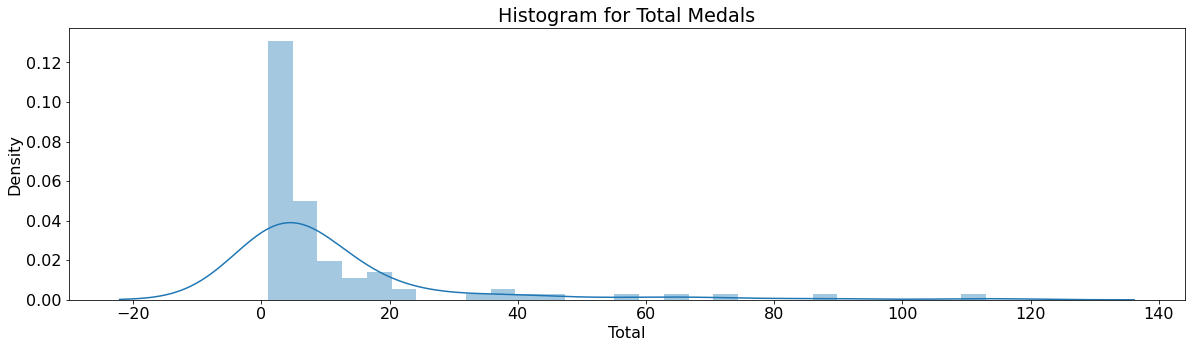

In [28]:
# Display the distribution of total medals
# The plot shows that the medal tally is not evenly distributed signifying 
# the dominace of a few nations in the Olympics
f, ax = plt.subplots(figsize=(20,5))
sns.distplot(tokyo_medals_sorted_df['Total'])
plt.title("Histogram for Total Medals")

Text(0.5, 1.0, 'KDE Plot for Total Medals')

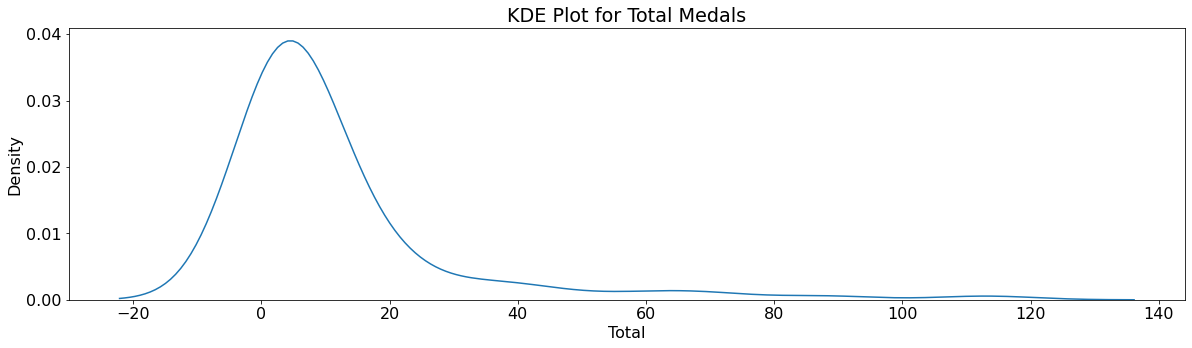

In [27]:
# Display the Kernel Density Estimate (KDE) plot for the total medals. 
# This is similar the histogram above.
# The plot shows that the medal tally is not evenly distributed signifying 
# the dominace of a few nations in the Olympics
f, ax = plt.subplots(figsize=(20,5))
sns.kdeplot(tokyo_medals_sorted_df['Total'])
plt.title("KDE Plot for Total Medals")

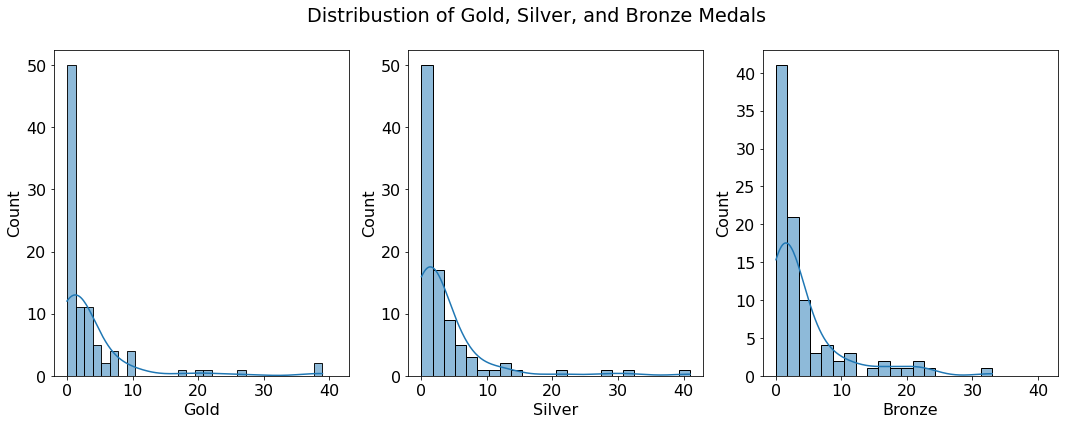

In [26]:
# Show multiple histograms for each of the gold, silver, and bronze medal tally
# within a single plot using the subplots functions.
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Distribustion of Gold, Silver, and Bronze Medals ')
sns.histplot(tokyo_medals_sorted_df['Gold'] , kde=True,ax=axes[0])
sns.histplot(tokyo_medals_sorted_df['Silver'] , kde=True,ax=axes[1])
sns.histplot(tokyo_medals_sorted_df['Bronze'] , kde=True,ax=axes[2])

Text(0, 0.5, 'Country')

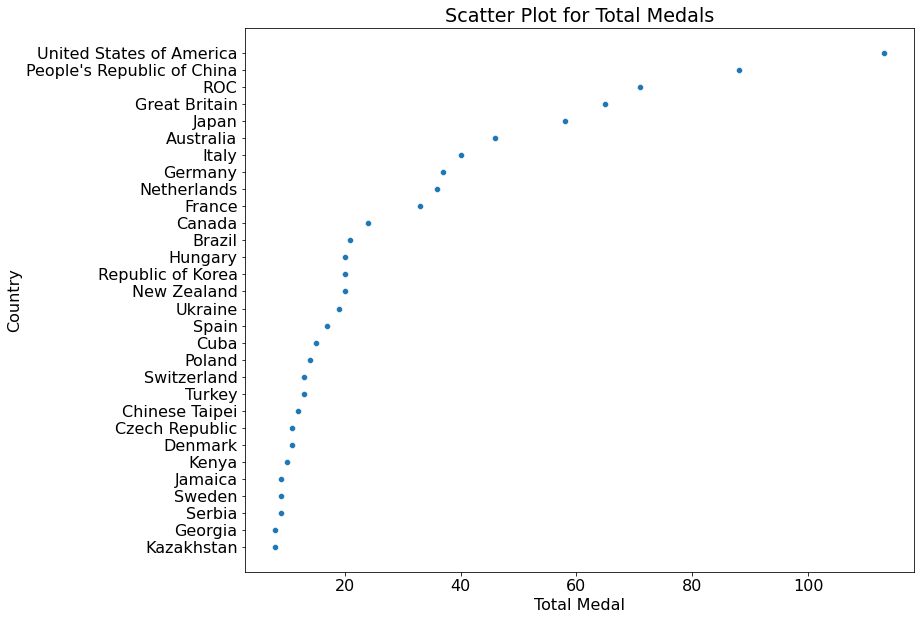

In [38]:
# Display a scatter plot for total medals of fisrt 30 countries
plt.figure(figsize=(12,10))
sns.scatterplot(x='Total',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title("Scatter Plot for Total Medals")
plt.xlabel("Total Medal")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

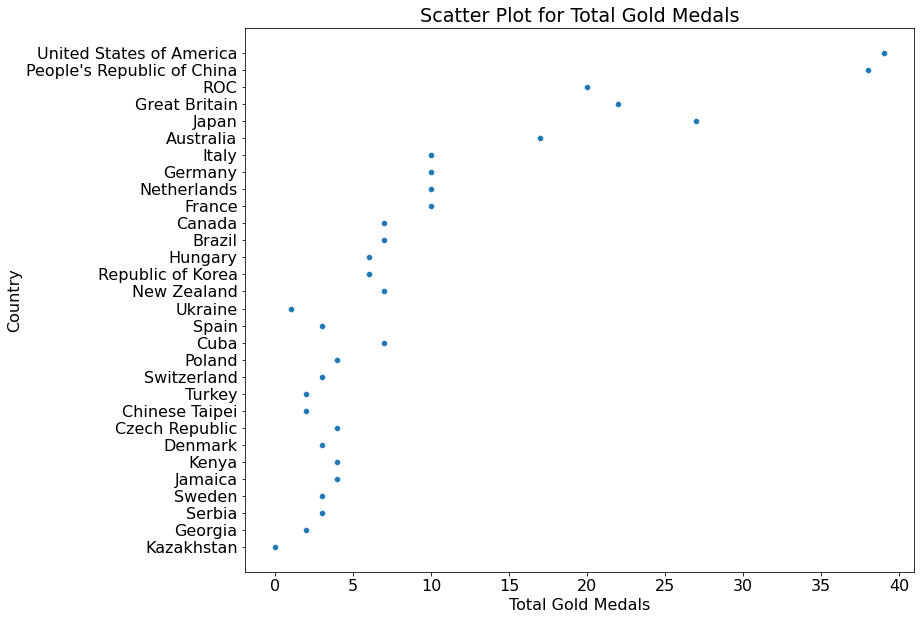

In [39]:
# Display a scatter plot for total gold medals of fisrt 30 countries
plt.figure(figsize=(12,10))
sns.scatterplot(x='Gold',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title("Scatter Plot for Total Gold Medals")
plt.xlabel("Total Gold Medals")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

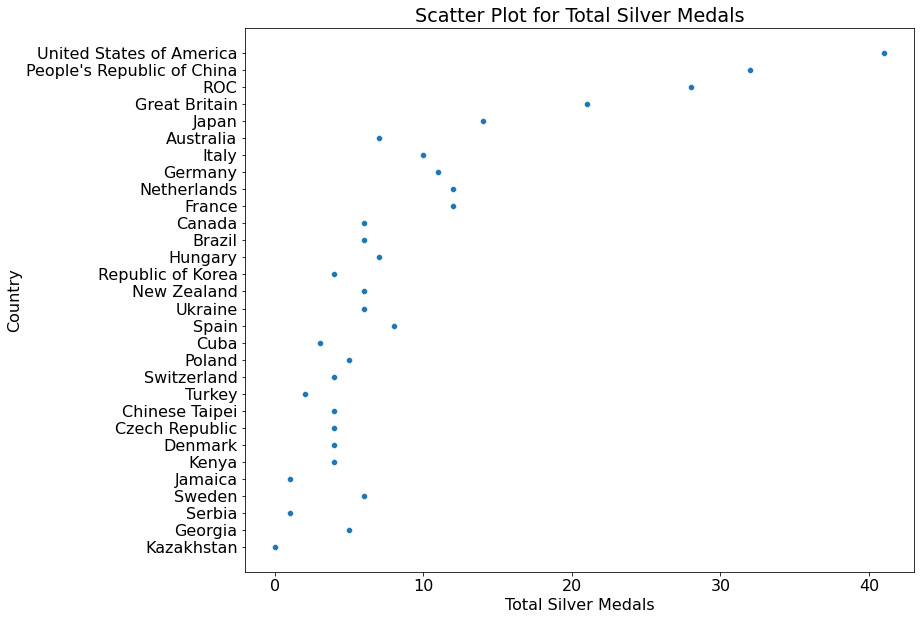

In [40]:
# Display a scatter plot for total silver medals of fisrt 30 countries
plt.figure(figsize=(12,10))
sns.scatterplot(x='Silver',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title("Scatter Plot for Total Silver Medals")
plt.xlabel("Total Silver Medals")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

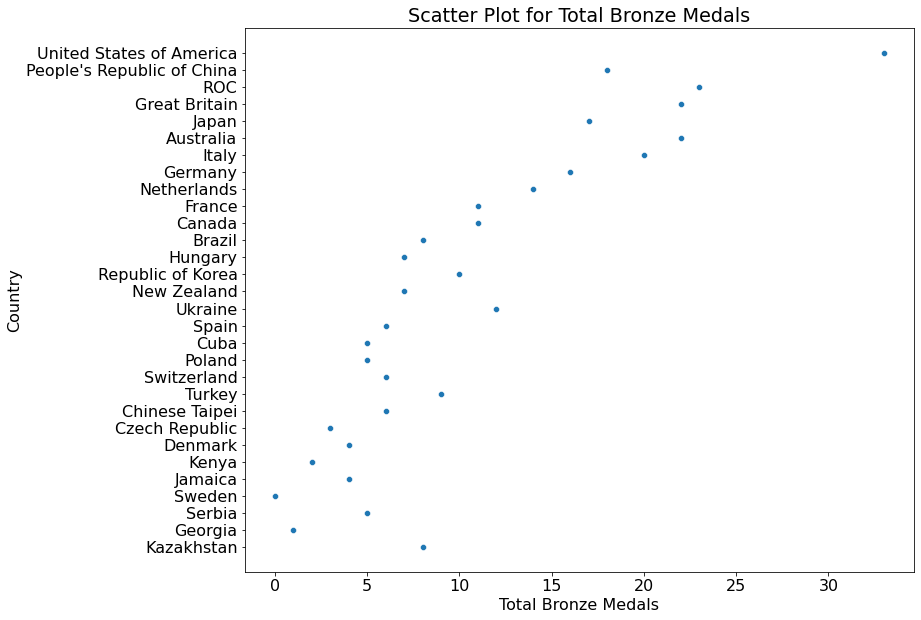

In [41]:
# Display a scatter plot for total bronze medals of fisrt 30 countries
plt.figure(figsize=(12,10))
sns.scatterplot(x='Bronze',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title("Scatter Plot for Total Bronze Medals")
plt.xlabel("Total Bronze Medals")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

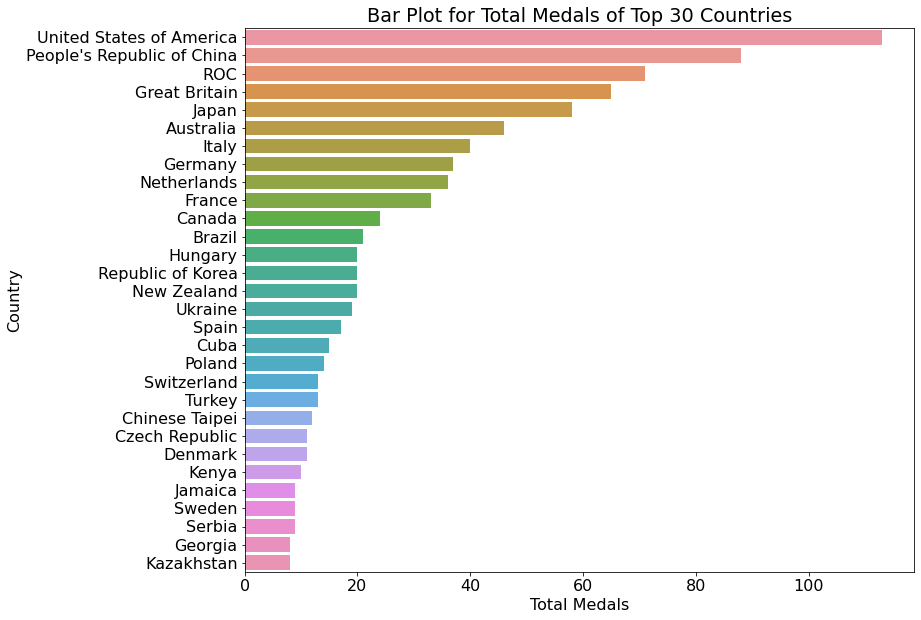

In [52]:
# Display a bar plot for total medals of fisrt 30 countries
plt.figure(figsize=(12, 10))
sns.barplot(x='Total',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title('Bar Plot for Total Medals of Top 30 Countries')
plt.xlabel("Total Medals")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

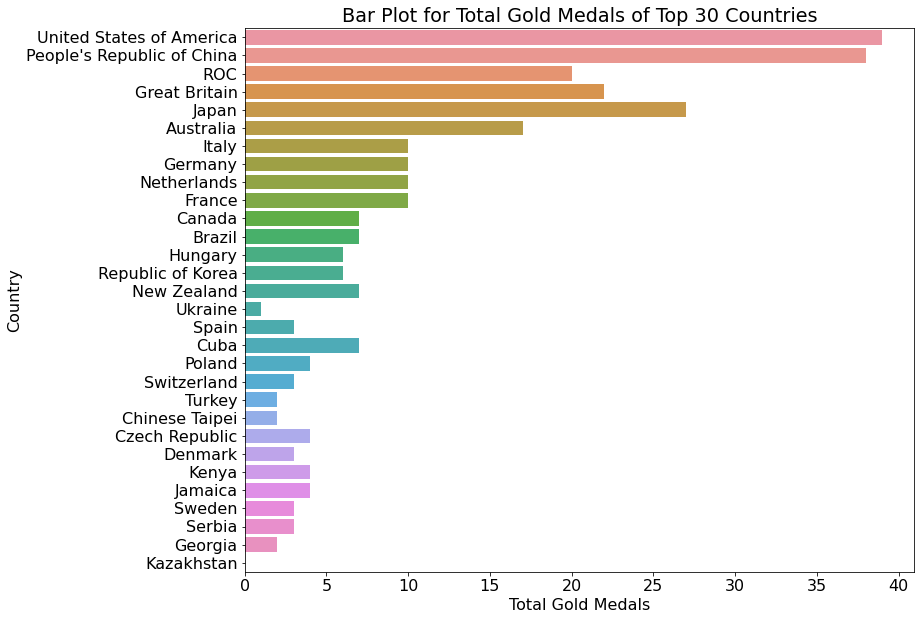

In [53]:
# Display a bar plot for total gold medals of top 30 countries
plt.figure(figsize=(12, 10))
sns.barplot(x='Gold',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title('Bar Plot for Total Gold Medals of Top 30 Countries')
plt.xlabel("Total Gold Medals")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

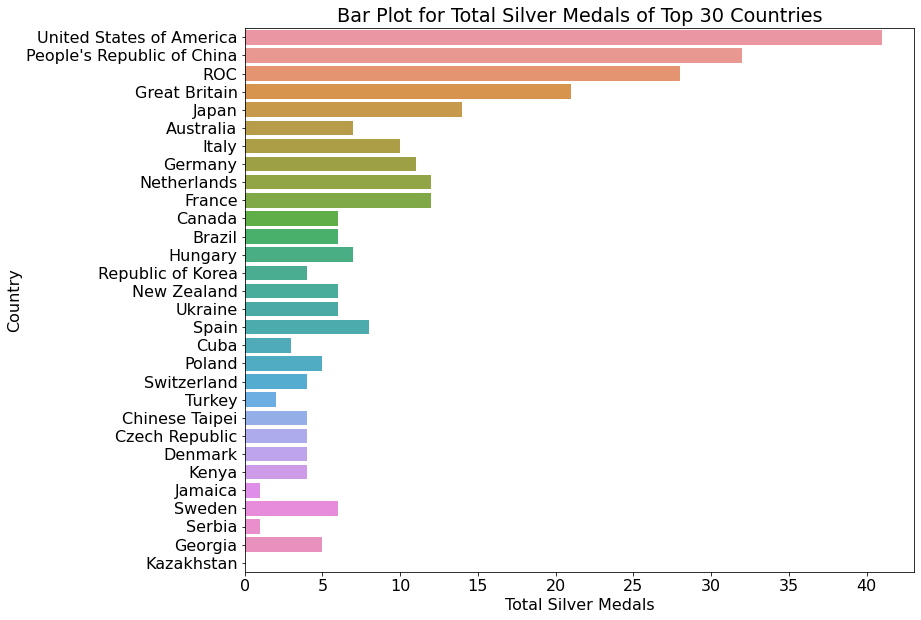

In [54]:
# Display a bar plot for total silver medals of top 30 countries
plt.figure(figsize=(12, 10))
sns.barplot(x='Silver',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title('Bar Plot for Total Silver Medals of Top 30 Countries')
plt.xlabel("Total Silver Medals")
plt.ylabel("Country")

Text(0, 0.5, 'Country')

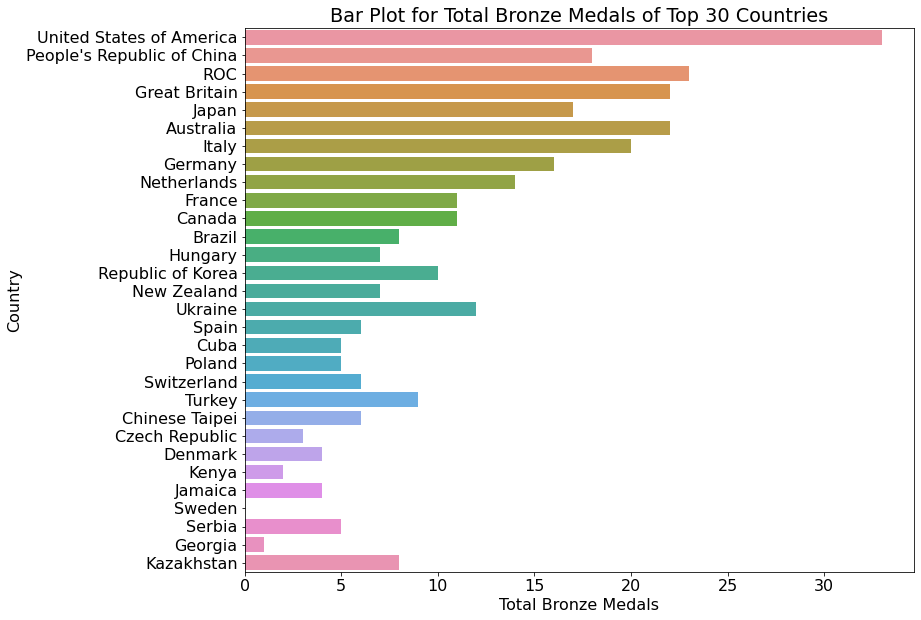

In [55]:
# Display a bar plot for total bronze medals of top 30 countries
plt.figure(figsize=(12, 10))
sns.barplot(x='Bronze',y='Team/NOC',data=tokyo_medals_sorted_df[:30])
plt.title('Bar Plot for Total Bronze Medals of Top 30 Countries')
plt.xlabel("Total Bronze Medals")
plt.ylabel("Country")

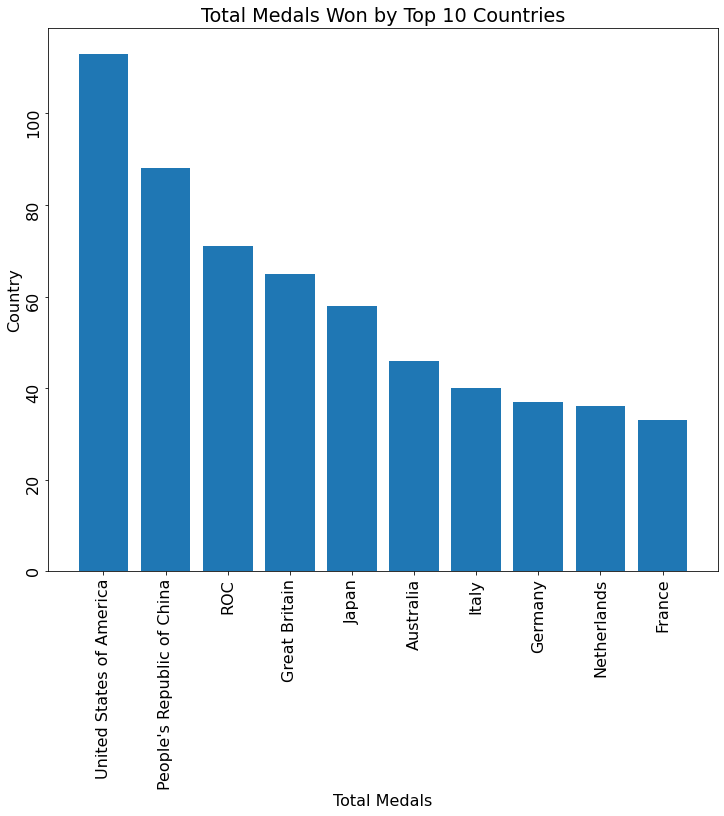

In [61]:
# Display the bar plot using matplotlib for top 10 countries
fig,ax = plt.subplots(figsize = (12,10))
plt.bar(tokyo_medals_sorted_df['Team/NOC'][:10], tokyo_medals_sorted_df['Total'][:10])

plt.title('Total Medals Won by Top 10 Countries')
plt.xlabel('Total Medals')
plt.ylabel('Country')
# Fit axis labels
plt.tick_params(rotation=90)
plt.show()

In [64]:
# Display pie chart of total medals for top 10 countries using plotly
px.pie(tokyo_medals_sorted_df[:10],names="Team/NOC",values="Total",
       title="Pie Chart for Total Medals of Top 10 Countries",
      )

In [65]:
# Display pie chart of total gold medals for top 10 countries using plotly
px.pie(tokyo_medals_sorted_df[0:10],names="Team/NOC",values="Gold",
       title="Pie Chart for Total Gold Medals of Top 10 Countries")

In [66]:
# Display pie chart of total silver medals for top 10 countries using plotly
px.pie(tokyo_medals_sorted_df[0:10],names="Team/NOC",values="Silver",
       title="Pie Chart for Total Silver Medals of Top 10 Countries")

In [67]:
# Display pie chart of total bronze medals for top 10 countries using plotly
px.pie(tokyo_medals_sorted_df[0:10],names="Team/NOC",values="Bronze",
       title="Pie Chart for Total Bronze Medals of Top 10 Countries")

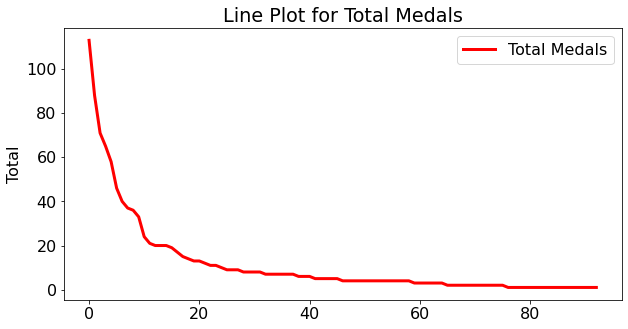

In [68]:
# Line plot for total medals
plt.figure(figsize = (10,5))
sns.lineplot(data = tokyo_medals_sorted_df['Total'], linewidth = 3
             ,label = 'Total Medals', color = 'red', markers = True)
plt.title('Line Plot for Total Medals')
plt.show()

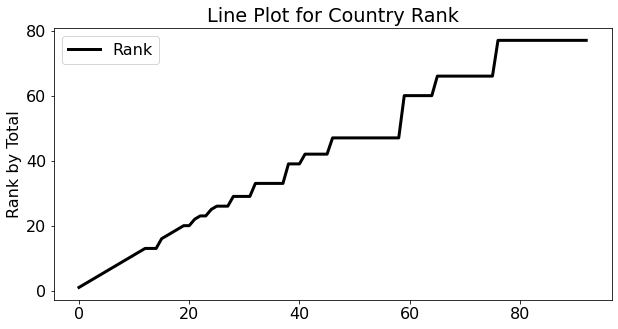

In [69]:
# Line plot for countries' rank
plt.figure(figsize = (10,5))
sns.lineplot(data =  tokyo_medals_sorted_df['Rank by Total'], linewidth = 3
             ,label = 'Rank', color = 'black', markers= True)
plt.title('Line Plot for Country Rank')
plt.show()

Text(0.5, 1.0, 'Combined Line Plot for Total Medals and Rank')

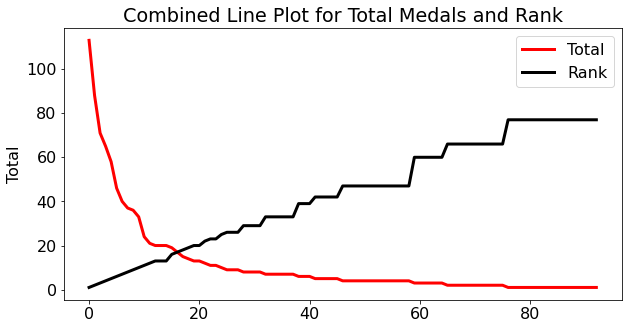

In [71]:
# Let's display the relationship between rank and total medals
# We can observe an opposite relation between total medals and rank
plt.figure(figsize = (10,5))
sns.lineplot(data = tokyo_medals_sorted_df['Total'], linewidth = 3
             ,label = 'Total', color = 'red', markers = True)
sns.lineplot(data =  tokyo_medals_sorted_df['Rank by Total'], linewidth = 3
             ,label = 'Rank', color = 'black', markers= True)
plt.title('Combined Line Plot for Total Medals and Rank')

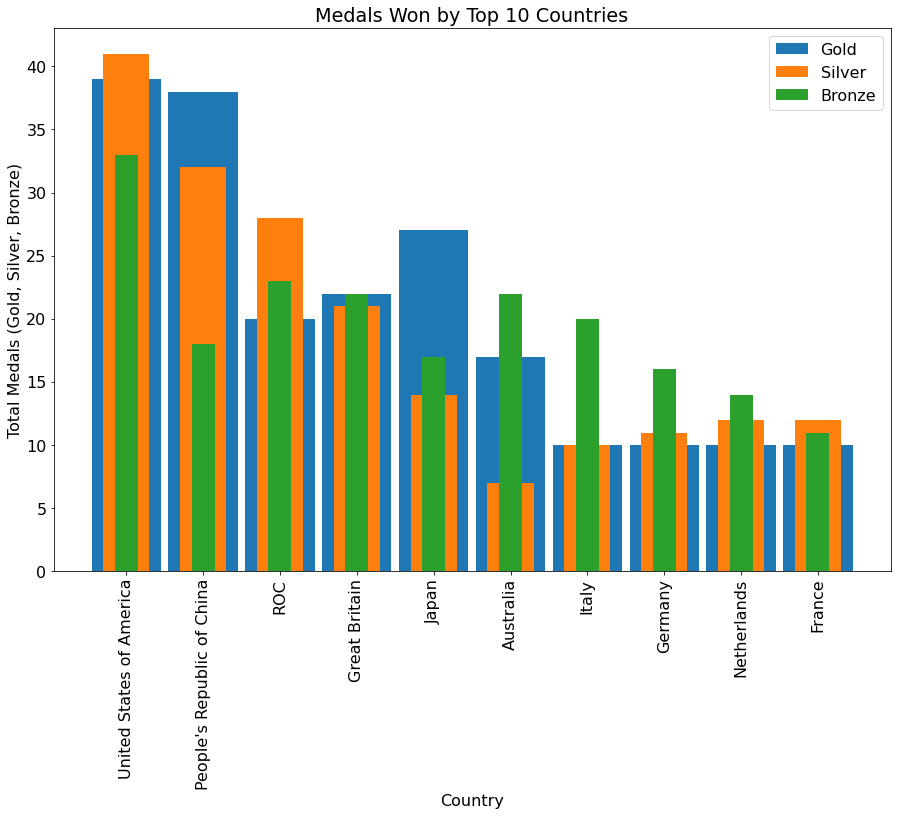

In [73]:
# Combined bar plot for total gold, silver, and bronze medals using matplotlib
fig,ax = plt.subplots(figsize = (15,10))
plt.bar(tokyo_medals_sorted_df['Team/NOC'][:10], tokyo_medals_sorted_df['Gold'][:10], width=0.9, label = 'Gold')
plt.bar(tokyo_medals_sorted_df['Team/NOC'][:10], tokyo_medals_sorted_df['Silver'][:10], width=0.6, label = 'Silver')
plt.bar(tokyo_medals_sorted_df['Team/NOC'][:10], tokyo_medals_sorted_df['Bronze'][:10], width=0.3, label = 'Bronze')

plt.title('Combined Medals Tally Won by Top 10 Countries')
plt.xlabel('Country',)
plt.ylabel('Total Medals (Gold, Silver, Bronze)')
plt.legend()
# Fir x axis labels
plt.xticks(rotation=90)
plt.show()